In [2]:
%matplotlib inline
import xarray as xr
import numpy as np
import oocgcm.filtering.timefilters as tf
import dask.array as da
import pylab as plt
import importlib
import xarray as xr

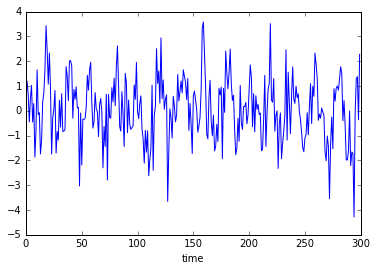

In [3]:
# Generate a sinusoid with a period of 20 yr overimposed on a rednoise
A = 1
T = 20
n = 300
time = np.arange(300)
data = tf.rednoise(0.1, n) + A * np.cos(2 * np.pi / T * time)
data2 = xr.DataArray(data, coords=[time], dims=['time'])
signal = data2.chunk(chunks={'time':100})
signal.plot()

<xarray.Window 'lanczos' (time: 21)>
array([ 0.00319811,  0.01093531,  0.02024545,  0.03072499,  0.04182639,
        0.05289805,  0.06323724,  0.07215102,  0.0790188 ,  0.08334984,
        0.08482962,  0.08334984,  0.0790188 ,  0.07215102,  0.06323724,
        0.05289805,  0.04182639,  0.03072499,  0.02024545,  0.01093531,
        0.00319811])
Coordinates:
  * time     (time) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10


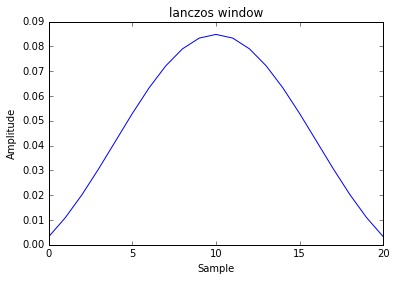

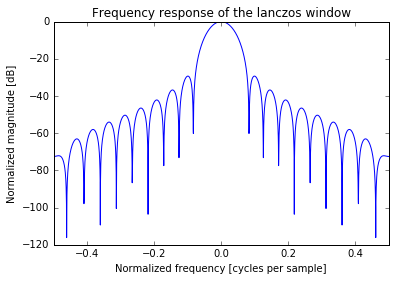

In [4]:
win_lcz = tf.Window('lanczos', n=[10], dims=['time'], fc=0.02)
print win_lcz
win_lcz.plot()

In [5]:
signal_lf = win_lcz.convolve(signal)

Coordinates:
  * time     (time) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
{0: 10}


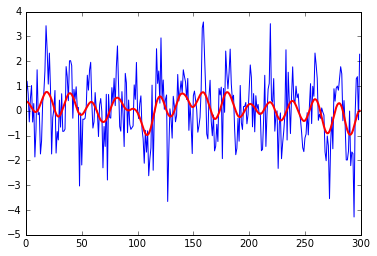

In [6]:
plt.plot(signal, lw=1)
plt.plot(signal_lf, lw=2, color='r')